In [1]:
import pandas as pd
import sqlite3
import requests
import numpy as np
import folium
import folium.plugins 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
import tabulate

In [2]:
con = sqlite3.connect('Campsite_data_4k.db')
query = ''' SELECT A.Latitude, A.Longitude, A.Campsite_Name, Agg_Cluster_Labels, Kmeans_Cluster_Labels FROM Agg A, Kmeans K where A.Latitude = K.Latitude'''
df_RV = pd.read_sql_query(query,con)

In [3]:
df_RV

,Latitude,Longitude,Campsite_Name,Agg_Cluster_Labels,Kmeans_Cluster_Labels
0,44.030277,-73.403468,10 Acres Campground and RV Park,1.0,2.0
1,26.145834,-97.958195,1015 RV Park,1.0,4.0
2,51.415188,-112.632344,11 Bridges Campground and RV Park,3.0,0.0
3,58.716979,-124.912576,115 Creek Rest Area (no services),NaN,NaN
4,62.387044,-140.873463,1202 Motor Inn and RV Park,2.0,5.0
...,...,...,...,...,...
5316,37.236637,-112.856060,Zion RV and Campground,NaN,NaN
5317,37.231969,-113.364556,Zion West RV Park,NaN,NaN
5318,37.170192,-113.373832,Zion's Gate RV Resort,NaN,NaN
5319,35.224768,-114.014515,Zuni Village RV Park,NaN,NaN


In [4]:
df_RV = df_RV.fillna(7)

In [5]:
range_i = list(range(1,int(df_RV['Agg_Cluster_Labels'].max()+2)))
df_clusters = []
#df_clusters_stats = []
#top_ten = []
for cluster in range_i:
    df_clusters.append(df_RV[df_RV['Agg_Cluster_Labels'] == cluster-1])
    #cols = (df_clusters[-1] != 0).any()
    #df_clusters[-1] = df_clusters[-1][cols[cols].index]
    #try:
        #df_clusters_stats.append(df_clusters[-1].drop(['Agg_Cluster_Labels'],1).describe().T.sort_values(by='mean', ascending=False))
    #except:
        #df_clusters_stats.append(df_clusters[-1].describe().T.sort_values(by='mean', ascending=False))
    #temp = {}
    #temp['name'] = 'Cluster {}'.format(cluster-1)
    #lo = 0
    #for top in df_clusters_stats[-1].iloc[:10].reset_index()['index'].tolist():
        #lo = lo+1
        #temp[str(lo)] = top
    #top_ten.append(temp)
    #print(cluster)
#df_top_ten = pd.DataFrame(top_ten).set_index(['name'])
#df_top_ten

In [6]:
df_clusters[0]

,Latitude,Longitude,Campsite_Name,Agg_Cluster_Labels,Kmeans_Cluster_Labels
5,34.560453,-85.552682,1776 RV and Campground,0.0,3.0
7,34.200347,-95.414232,2 J's Baldwood RV Park,0.0,2.0
10,33.706609,-113.819411,3 Dreamers RV Park,0.0,2.0
16,38.043562,-120.398870,49er RV Ranch,0.0,2.0
20,36.813174,-108.090017,505 RV Park,0.0,4.0
...,...,...,...,...,...
4955,35.784634,-83.632833,Up the Creek RV Camp,0.0,2.0
4957,45.839305,-86.664431,Upper Peninsula Golf and Lake Resort RV Campgr...,0.0,3.0
4961,26.714688,-81.785027,Upriver RV Resort,0.0,2.0
4962,37.429206,-105.440099,Ute Creek RV Park and Campground,0.0,3.0


In [7]:
cluster_stats = []
for cluster in df_clusters:
    temp = {}
    temp['Cluster'] = str(int(cluster['Agg_Cluster_Labels'].mean()))
    for i in range_i:
        temp[str(i-1)] = cluster[cluster['Kmeans_Cluster_Labels'] == i-1]['Kmeans_Cluster_Labels'].count()
    cluster_stats.append(temp)

In [8]:
df_cluster_stats = pd.DataFrame(cluster_stats).set_index('Cluster')
df_cluster_stats

,0,1,2,3,4,5,6,7
Cluster,,,,,,,,
0,26,55,1587,572,370,53,25,0
1,1,19,216,78,1181,15,6,0
2,0,7,12,10,2,88,2,0
3,126,6,6,108,1,10,29,0
4,0,10,7,16,0,0,69,0
5,35,0,0,0,0,0,0,0
6,0,108,4,6,6,1,0,0
7,0,0,0,0,0,0,0,448


We would ideally like to see al lthe values run down the diagonal so that the relative groups can have the same labels. Currently the numbers of the groups between the two tests don't match

In [9]:
relabel_groups_list=[]
for i in df_cluster_stats.columns:
    relabel_groups_list.append(int(df_cluster_stats[df_cluster_stats[i].max() == df_cluster_stats[i]].reset_index()['Cluster'].values))

In [10]:
relabel_groups_list[3]=5
relabel_groups_list

[3, 6, 0, 5, 1, 2, 4, 7]

In [11]:
df_RV['new_Kmeans_labels'] = df_RV['Kmeans_Cluster_Labels'].map(lambda x:relabel_groups_list[int(x)])

In [12]:
df_RV

,Latitude,Longitude,Campsite_Name,Agg_Cluster_Labels,Kmeans_Cluster_Labels,new_Kmeans_labels
0,44.030277,-73.403468,10 Acres Campground and RV Park,1.0,2.0,0
1,26.145834,-97.958195,1015 RV Park,1.0,4.0,1
2,51.415188,-112.632344,11 Bridges Campground and RV Park,3.0,0.0,3
3,58.716979,-124.912576,115 Creek Rest Area (no services),7.0,7.0,7
4,62.387044,-140.873463,1202 Motor Inn and RV Park,2.0,5.0,2
...,...,...,...,...,...,...
5316,37.236637,-112.856060,Zion RV and Campground,7.0,7.0,7
5317,37.231969,-113.364556,Zion West RV Park,7.0,7.0,7
5318,37.170192,-113.373832,Zion's Gate RV Resort,7.0,7.0,7
5319,35.224768,-114.014515,Zuni Village RV Park,7.0,7.0,7


In [13]:
range_i = list(range(1,int(df_RV['Agg_Cluster_Labels'].max()+2)))
df_clusters = []
for cluster in range_i:
    df_clusters.append(df_RV[df_RV['Agg_Cluster_Labels'] == cluster-1])
cluster_stats = []
for cluster in df_clusters:
    temp = {}
    temp['Cluster'] = str(int(cluster['Agg_Cluster_Labels'].mean()))
    for i in range_i:
        temp[str(i-1)] = cluster[cluster['new_Kmeans_labels'] == i-1]['new_Kmeans_labels'].count()
    cluster_stats.append(temp)
df_cluster_stats = pd.DataFrame(cluster_stats).set_index('Cluster').applymap(lambda x: int(x))
df_cluster_stats

,0,1,2,3,4,5,6,7
Cluster,,,,,,,,
0,1587,370,53,26,25,572,55,0
1,216,1181,15,1,6,78,19,0
2,12,2,88,0,2,10,7,0
3,6,1,10,126,29,108,6,0
4,7,0,0,0,69,16,10,0
5,0,0,0,35,0,0,0,0
6,4,6,1,0,0,6,108,0
7,0,0,0,0,0,0,0,448


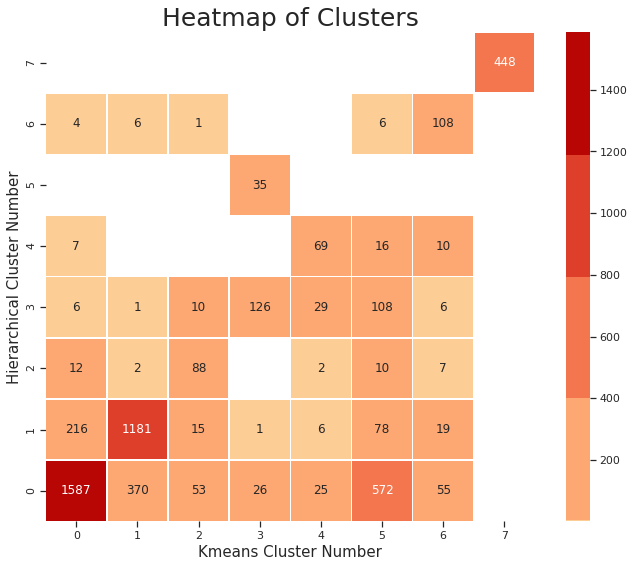

In [14]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9)), plt.axes()
cmap = sns.color_palette("OrRd")#sns.color_palette("light:#5A9", as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_cluster_stats[df_cluster_stats.columns.tolist()].replace({0:np.nan}).to_numpy(),
            annot=True,linewidths=.5,
            square=True,
            center=400,
            fmt='.0f',
            cmap = cmap).invert_yaxis() #400 635
plt.title('Heatmap of Clusters', fontsize = 25) # title with fontsize 20
plt.xlabel('Kmeans Cluster Number', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Hierarchical Cluster Number', fontsize = 15) # y-axis label with fontsize 15
plt.savefig('Agg_Kmeans_corr.png',dpi=300)
plt.show()

In [15]:
print(df_cluster_stats.to_markdown())

|   Cluster |    0 |    1 |   2 |   3 |   4 |   5 |   6 |   7 |
|----------:|-----:|-----:|----:|----:|----:|----:|----:|----:|
|         0 | 1587 |  370 |  53 |  26 |  25 | 572 |  55 |   0 |
|         1 |  216 | 1181 |  15 |   1 |   6 |  78 |  19 |   0 |
|         2 |   12 |    2 |  88 |   0 |   2 |  10 |   7 |   0 |
|         3 |    6 |    1 |  10 | 126 |  29 | 108 |   6 |   0 |
|         4 |    7 |    0 |   0 |   0 |  69 |  16 |  10 |   0 |
|         5 |    0 |    0 |   0 |  35 |   0 |   0 |   0 |   0 |
|         6 |    4 |    6 |   1 |   0 |   0 |   6 | 108 |   0 |
|         7 |    0 |    0 |   0 |   0 |   0 |   0 |   0 | 448 |
